In [118]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

In [119]:
u = mda.Universe('/home/michele/python_for_md/PureWater/Viscosity/Em3-kinetic-energy/confout.gro', 
                 '/home/michele/python_for_md/PureWater/Viscosity/Em3-kinetic-energy/traj-end.trr')
print(u.trajectory.ts, u.trajectory.time)
u.trajectory[1]

< Timestep 0 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] > 7500.0


< Timestep 1 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >

In [120]:
mo = 15.9994
mh = 1.008
mass = []
for a in u.atoms :
    if a.type=='O' :
        mass.append(mo)
    if a.type=='H' :
        mass.append(mh)
mass = np.array(mass)
print(len(mass))

24651


In [121]:
class binner :
    
    def __init__(self, nbins, bounds) :
        self.nbins = nbins
        self.lb = bounds[0]
        self.ub = bounds[1]
        self.dx = (self.ub-self.lb)/self.nbins
        
    def do_binning(self, x, y) :
        occ = np.zeros(nbins, dtype=float)
        val = np.zeros(nbins, dtype=float)
        for i in range(len(x)) :
            """
            if x[i] < self.lb :
                xval = self.ub-(self.lb-x[i])
            elif x[i] >= self.ub :
                xval = self.lb+(x[i]-self.ub)
            else :
                xval = x[i]
            """
            xval = x[i] + (x[i]<self.lb) * (self.ub-self.lb) + (x[i]>=self.ub) * (self.lb-self.ub)
            j = int((xval-self.lb)/self.dx)
            occ[j] += 1
            val[j] += y[i]
        # Assume there is at least one occurrence
        return val/occ

In [122]:
Lz = 9.95399
bounds = [0.0, Lz]
nbins = 20
my_bin = binner(nbins, bounds)
ekin_dist = np.zeros(nbins)
z_range = np.linspace(my_bin.dx, Lz-my_bin.dx, nbins)

In [123]:
rho = 996.9509
xi = 0.001 * 1e13
nim1 = 1471.99
k = 2*np.pi/Lz * 1e9

# rho = 996.9510
# xi = 0.01 * 1e13
# nim1 = 1449.18
# k = 2*np.pi/Lz * 1e9

# [nm/ns]
V = xi*rho*nim1/(k*k)

# [1/nm]
k = (1e-9)*k

print(V)
print(k)

0.03683098153908654
0.6312227867598408


In [124]:
# V = 10*0.003714660536738601
# k = 0.1*0.6486015999516466

peculiar = lambda z : V*np.cos(k*z)

kB = (1.380649/1.66054) * 1e4

In [125]:
for ts in u.trajectory :
    print("Frame "+str(ts))
    pos = ts.positions
    z = []
    for p in pos :
        z.append(p[2])
    z = 0.1*np.array(z)
    c = np.column_stack((np.zeros(len(z)), np.zeros(len(z)), peculiar(z)))
    vel = (1e2)*ts.velocities - c
    ekin = 0.5*mass*np.sum(vel*vel, axis=1)
    # Temperature
    ekin = ekin/kB
    ekin_dist += my_bin.do_binning(z, ekin)
ekin_dist /= len(u.trajectory)

Frame < Timestep 0 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 1 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 2 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 3 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 4 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 5 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 6 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 7 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 8 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 9 

Frame < Timestep 75 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 76 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 77 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 78 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 79 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 80 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 81 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 82 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 83 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Ti

Frame < Timestep 150 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 151 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 152 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 153 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 154 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 155 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 156 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 157 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 158 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
F

Frame < Timestep 224 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 225 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 226 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 227 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 228 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 229 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 230 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 231 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
Frame < Timestep 232 with unit cell dimensions [49.770004 49.770004 99.5399   90.       90.       90.      ] >
F

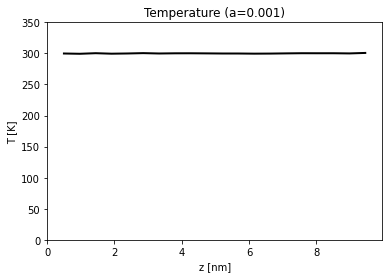

In [126]:
fig = plt.figure()
plt.plot(z_range, ekin_dist, 'k-', linewidth=2.0)
plt.xlim(0,Lz)
plt.ylim(0,350)
plt.title("Temperature (a=0.001)")
plt.xlabel("z [nm]")
plt.ylabel("T [K]")
fig.savefig('temperature_profile_Em3.png', dpi=199)